# The solow model and the solow model with human capital 

Imports and set magics:

In [35]:
import numpy as np
import sympy as sm
from scipy import optimize
from sympy import Symbol
from sympy.solvers import solve
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets

# output
sm.init_printing(use_unicode=True)

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# output
sm.init_printing(use_unicode=True)

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# The basic solow Model 



In the basic solow model we have:

$K_t$ as capital\
$L_t$ as labor\


The model also contains
The GDP\
$Y_t =F(K_t,L_t)$\
$Y_t= B*K_t^\alpha*L_1^{1-\alpha}$\
$r_t=\alpha*B*\left(\frac{K_t}{K_t}\right)$\
$w_t=(1-\alpha) B\left(\frac{K_t}{L_t}\right)^{\alpha}$\
The savings\
$S_t=sY_t,s \in (0,1)$\
$K_{t+1}-K_t=S_t-\delta K_t$\
where we have: $k_t=S_t+(1-\delta)K_t$\
$L_{t+1}=(1+n)L_t$

In the basic solow model we can use this notation for per capita.

$y_t=\left(\frac{Y_t}{L_t}\right)$\
$k_t=\left(\frac{K_t}{L_t}\right)$
    

## Analytical solution

First we will solove the basic solow model analytically. We will do it out from the solution for the steady state, where we have the capital is constant, in the order to do this we set the solow equation to zero and thus find k. After this it is possible to finding the steady state in an analitical equation for $k^*$. Now we can use the notation for $y_t={Y_t}/{L_t}$ and insert the fund value of $k^*$ and from this we will get the steady state for ${GDP}/{worker}$


In [ ]:
#Define parameter and symbols
n,s,B,k,kstar,ystar,alpha,delta=sm.symbols('n s B k k^* y^* alpha delta')

#Here we will solve the equation for k
Solow_eq = sm.Eq(((s*B*k**alpha-(n + delta)*k)/(1 + n)),0)

#Now it is possible to find the steady-state for k 
k_s=sm.solve(Solow_eq,k)[0]
s_s_k=sm.Eq(kstar,k_s)

# Define y 
y=B*k**alpha

# Find the steady state for y
y_s=y.subs(k,k_s)
s_s_y=sm.Eq(ystar,y_s)

#print equation for k* and y*  
display(s_s_k)
display(s_s_y)

This is the steady state $k^*$ and $y^*$

In [ ]:
#Function in python
k_s_f= sm.lambdify((alpha, delta, B, n, s), k_s)

For Findning the steady state value of $k^*$ and $y^*$ we must define our paremeters in the basic solow model.

In [ ]:
#Define the value of the parameteres in the model
n= 0.025
alpha=1/3
delta=0.05
s=0.3
B=1

In [ ]:
#The steady state value for k
k_s_v = k_s_f(alpha, delta, B, n, s)

# Print the steady state value for k with the values of the parameters
ss_k_v = sm.Eq(kstar, k_s_v)
sm.pprint(ss_k_v)

Now it is possible to find the value for y in steady state by using the steady state value for k 

In [ ]:
# The steady-state value for y 
y_s_v = B * k_s_v**alpha

# Print the steady state value for y with the values of the parameters
ss_y_e = sm.Eq(ystar, y_s_v)
sm.pprint(ss_y_e)

## Numerical solution

In [ ]:
def solow_s_s_k(n: float, s: float, B: float, alpha: float, delta: float) -> float:
    """
    Finds the solow steady state for capital by using the bisect optimizer from module Scipy

    Args :
    alpha: Output elasticity wrt capital
    delta: Physical capital depreciation rate
    s    : Savings rate
    n    : Population growth
    B    : Productivity parameter
    """

    # The solow euqation
    solow_eq = lambda k: s * B * k**alpha - (n + delta) * k
    
    # optimize
    return optimize.bisect(solow_eq, 1, 100)

k_star = solow_s_s_k(n, s, B, alpha, delta)
print(f'k* = {k_star:.3f}')


In [ ]:
# Define function to plot Solow diagram
def plot_solow_diagram(k: int, n: float, s: float, B: int, alpha: float, delta: float, kt_xmax: int, kt_vline: float):
    # Calculate the growth rates of capital per capita and the diagonal line
    k_growth = [s * B * t**alpha for t in range(kt_xmax + 1)]
    diagonal = [(n + delta) * t for t in range(kt_xmax + 1)]

    # Calculate steady state capital per capita
    k_star = ((s*B)/(n+delta))**(1/(1-alpha))

    # Configure plot settings
    plt.rcParams['axes.facecolor'] = 'white'
    plt.figure(figsize=(8, 6))
    plt.plot(k_growth, label=r'$sBk_t^{\alpha}$', color='salmon')
    plt.plot(diagonal, label=r'$(n+\delta)k_t$', color='dimgrey')
    plt.axvline(x=k_star, linestyle='--', color='violet', label=r'$k*$')
    plt.axvline(x=kt_vline, linestyle='--', color='teal', label=r'$k_t$')
    plt.xlim(0, kt_xmax)
    plt.xlabel('Capital per capita, $k_t$')
    plt.ylabel('')
    plt.legend()
    plt.title('Figure 1: Solow Diagram')
    plt.grid(True)  # add grid
    
    # Add arrows to the plot
    arrow_len = abs(k_star - kt_vline)
    arrow_positions = [0.3, 0.6, 0.8, 0.9, 0.95, 1]
    
    # If kt_vline is to the left of k_star, flip the direction of the arrows
    if kt_vline < k_star:
        arrow_len = -arrow_len
        arrow_positions = [1 - pos for pos in arrow_positions]
    else:
        arrow_positions = [1 - pos for pos in arrow_positions]
    
    arrow_center = min(k_star, kt_vline) + abs(arrow_len) / 2
    
    # Add each arrow to the plot
    for pos in arrow_positions:
        arrow_x = arrow_center + arrow_len * (pos - 0.5)
        plt.annotate(
            '',
            xy=(kt_vline, 0), xycoords='data',
            xytext=(arrow_x, 0), textcoords='data',
            arrowprops=dict(
                arrowstyle="<-", color="black", lw=1, mutation_scale=15
            )
        )

    # print plot
    plt.show()

# Create an interactive widget to display the Solow diagram
widgets.interact(
    plot_solow_diagram,
    k=widgets.fixed(0),
    alpha=widgets.FloatSlider(description=r'α', min=0, max=0.9, step=0.05, value=0.3, layout=widgets.Layout(width='50%')),
    delta=widgets.FloatSlider(description=r'δ', min=0, max=0.1, step=0.01, value=0.01, layout=widgets.Layout(width='50%')),
    s=widgets.FloatSlider(description='s', min=0.01, max=0.8, step=0.05, value=0.4, layout=widgets.Layout(width='50%')),
    n=widgets.FloatSlider(description='n', min=0.01, max=0.1, step=0.005, value=0.01, layout=widgets.Layout(width='50%')),
    B=widgets.fixed(1),
    kt_xmax=widgets.IntSlider(description='k_t axis', min=1, max=100, step=10, value=100, layout=widgets.Layout(width='50%')),
    kt_vline=widgets.FloatSlider(description='k_t', min=0, max=100, step=0.1, value=20, layout=widgets.Layout(width='50%'))
)

The plot shows how different parameter values changes the steady state. The savings rate and the alpha parameter affects the steady state positively, while population growth and the depriciation rate affects the steady state negatively. 

# Solow Model with Human Capital

Now we extend the basic solow model to the solow model with human capital. Therefor we have following equation for the solow model with human capital.

$Y_t=K_t^\alpha H_t^{\varphi}\left(A_t L_t\right)^{1-\alpha-\varphi}$\
$r_t=\alpha\left(\frac{K_t}{A_t L_t}\right)^{\alpha-1}\left(\frac{H_t}{A_t L_t}\right)^{\varphi}$\
$w_t=(1-\alpha)\left(\frac{K_t}{A_t L_t}\right)^\alpha\left(\frac{H_t}{A_t L_t}\right)^{\varphi} A_t$\
$K_{t+1}-K_t=s_K Y_t-\delta K_t$\
$H_{t+1}-H_t=s_H Y_t-\delta H_t$\
$L_{t+1}=(1+n) L_t$\
$A_{t+1}=(1+g) A_t$\

In the solow model with human capital we have 
$\tilde k = \frac{K_t}{A_tL_t}$ and $\tilde h = \frac{h_t}{A_tL_t}$

In [36]:
n,g,s_k,s_h,k,h,alpha,phi,delta=sm.symbols('n g s_k s_h k h alpha phi delta')

In [39]:
#Steady state equation in the model
sk = sm.Eq((s_k*k**alpha*h**phi+(1-delta)*k)/((1+n)*(1+g)), k)
sh = sm.Eq((s_h*k**alpha*h**phi+(1-delta)*h)/((1+n)*(1+g)), h)


In [46]:
#First we find the steady state for k

ss_k = sm.Eq((s_k*k**alpha*h**phi+(1-delta)*k)/((1+n)*(1+g)), k) 
ss_k


 φ  α                   
h ⋅k ⋅sₖ + k⋅(1 - δ)    
──────────────────── = k
  (g + 1)⋅(n + 1)       

In [47]:
#Now we kan find the steady state for h
ss_h = sm.Eq((s_h*k**alpha*h**phi+(1-delta)*h)/((1+n)*(1+g)), h)
ss_h

             φ  α       
h⋅(1 - δ) + h ⋅k ⋅sₕ    
──────────────────── = h
  (g + 1)⋅(n + 1)       

In [48]:
#Finding steady state for k and h:
sss_k= sm.solve((ss_k, ss_h),(k,h), implicit = True, manual = True)
sss_k


⎧        φ  α                φ  α      ⎫
⎪       h ⋅k ⋅sₕ            h ⋅k ⋅sₖ   ⎪
⎨h: ───────────────, k: ───────────────⎬
⎪   δ + g⋅n + g + n     δ + g⋅n + g + n⎪
⎩                                      ⎭

In [49]:
#Python function:
ss_func = sm.lambdify((s_h,s_k,g,n,alpha,phi,delta,h,k),sss_k)


Now we have the equations we need and thus we can determine the value of the parameters in the model. After that we solve the values of our variables in the model.


In [50]:
#Define parameters
n= 0.01
g=0.02
alpha=1/3
delta=0.06
phi=1/3
s_k=0.1
s_h=0.1


In [ ]:
#do not work and therefore written out
#Analytical solution is defined:
#AnalyticalSolution = ss_func(s_h,s_k,g,n,alpha,phi,delta,h,k)


#AnalyticalSolution_ss = sm.Eq(sss_k,AnalyticalSolution)
#sm.pprint(AnalyticalSolution_ss)

#Due not work#
#print(f'Analytical solution is: k* = {AnalyticalSolution[0]:.3f}, h* = {AnalyticalSolution[1]:.3f}')


In [51]:
#Defining function for h: 
def solow_h_function(k: float, s_h:float, s_k: float, g:float, n: float, alpha: float, delta: float, phi: float, h: float) -> float:
    """
    Finds the solow steady state for capital by using the bisect optimizer from module Scipy

    Args :
    alpha: Return on physical capital
    phi  : Reuturn on human capital
    delta: Depreciation rate
    s_h  : Human capital investments
    s_k  : Psycial capital investments
    n    : Population growth
    g    : Technology growth
    k    : Physical capital
    h    : Human capital
    """

    

    return 1/((1+n)*(1+g))*(s_h*k**(alpha)*h**(phi)+(1-delta)*h)-h



In [52]:
#Defining function for k: 
def solow_k_function(h: float, s_h:float, s_k: float, g:float, n: float, alpha: float, delta: float, phi: float, k: float) -> float:
    """
    Finds the solow steady state for capital by using the bisect optimizer from module Scipy

    Args :
    alpha: Return on physical capital
    phi  : Reuturn on human capital
    delta: Depreciation rate
    s_h  : Human capital investments
    s_k  : Psycial capital investments
    n    : Population growth
    g    : Technology growth
    k    : Physical capital
    h    : Human capital
    """

    #Returning transition equation for physical capital:

    return 1/((1+n)*(1+g))*(s_k*k**(alpha)*h**(phi)+(1-delta)*k)-k


In [53]:
# define the function h and k together with vektors for replacing the endogene variables 
func = lambda x: [solow_h_function(x[1],s_h,s_k,g,n,alpha,delta,phi,x[0]),solow_k_function(x[0],s_h,s_k,g,n,alpha,delta,phi,x[1])]


In [54]:
#Solving the vector functions:
solution = optimize.root(func,[1,1],method = 'broyden1')


In [55]:
#The numerical solution:
NumericalSolution = solution.x

print(f'numsolution: k* = {NumericalSolution[1]:.3f}, h* = {NumericalSolution[0]:.3f}')


numsolution: k* = 1.363, h* = 1.363


This the vaule of the steady state vaule k and h ind the solow model with human capital

Phase diagram

Based on our numerical analysis, vectors are now constructed that make it possible to display a phase diagram for the model with human capita

In [56]:
#Function expressing the nullclines: 
def ss_0(s_h:float, s_k: float, g:float, n: float, alpha: float, delta: float, phi: float) -> float:
    """

    Args :
    alpha: Return on physical capital
    phi  : Return on human capital
    delta: Depreciation rate
    s_h  : Human capital investments
    s_k  : Psycial capital investments
    n    : Population growth
    g    : Technology growth
    h    : Human capital
    k    : Physical capital

    Returns:
    Nullclines for physical and human capital
    """
    
    #makning grids 
    k_vec = np.linspace(1e-4,3,500)
    h_vec_DeltaK0 = np.empty(500)
    h_vec_DeltaH0  = np.empty(500)

    # k grids
    for i,k in enumerate(k_vec):
        
        
        # define a object
        obj = lambda h: -solow_h_function(k,s_h,s_k,g,n,alpha,phi,delta,h)
        # we optimze
        result = optimize.root_scalar(obj,method='brentq',bracket=[1e-20,50])
        
        h_vec_DeltaH0[i] = result.root

       
        
        # one more
        obj = lambda h: -solow_k_function(h,s_h,s_k,g,n,alpha,phi,delta,k)

        # we optimize
        result = optimize.root_scalar(obj,method='brentq',bracket=[1e-20,50])

        h_vec_DeltaK0[i] = result.root

    return k_vec, h_vec_DeltaK0, h_vec_DeltaH0

#Solve 
k_vec, h_vec_DeltaK0, h_vec_DeltaH0 = ss_0(s_h,s_k,g,n,alpha,phi,delta)


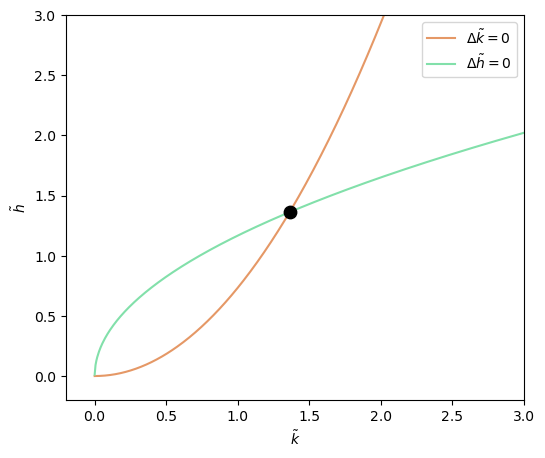

In [57]:
#Plot for the model
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
ax.plot(k_vec,h_vec_DeltaK0, label=r'$\Delta \tilde{k}=0$', c='#E59866')
ax.plot(k_vec,h_vec_DeltaH0, label=r'$\Delta \tilde{h}=0$', c='#82E0AA')
ax.set_xlabel(r'$\tilde{k}$')
ax.set_ylim(-0.2,3.0)
ax.set_xlim(-0.2,3.0)
ax.set_ylabel(r'$\tilde{h}$')
ax.legend() 

#SS point
plt.scatter(solution.x[1],solution.x[0],color='black',s=80,zorder=2.5)




From the phase diagram, it can be seen how the two curves intersect and form a steady state, which is marked by the black dot.

# Experiement: An increase in the investment rate in $s_H$

In this experiment we will look at a increase in the investment rate in the human capital. This happens through a political experiment where the increase in the investment rate in human capital is permanently.

In [ ]:
#start importning 
from matplotlib.lines import Line2D

In [ ]:


def plot_combinations_new(s_k, s_h, alpha, phi, n, g, delta):
    #  The steady state equation so it is possible to plot later
    ktilde_ss = ((s_k ** (1 - phi) * s_h ** phi) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    htilde_ss = ((s_k ** alpha * s_h ** (1 - alpha)) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    ktildenew_ss = ((s_k ** (1 - phi) * (s_h * 1.3) ** phi) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    htildenew_ss = ((s_k ** alpha * (s_h * 1.3) ** (1 - alpha)) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    
    # define grids
    ktilde_values = np.linspace(0.01, 2 * ktilde_ss, 100)
    htilde_values = np.linspace(0.01, 2 * htilde_ss, 100)
    Ktilde, Htilde = np.meshgrid(ktilde_values, htilde_values)
    
    # null-clines
    delta_ktilde = (1 / ((1 + n) * (1 + g))) * (s_k * Ktilde ** alpha * Htilde ** phi - (n + g + delta + n * g) * Ktilde)
    delta_htilde = (1 / ((1 + n) * (1 + g))) * (s_h * Ktilde ** alpha * Htilde ** phi - (n + g + delta + n * g) * Htilde)
    delta_htildenew = (1 / ((1 + n) * (1 + g))) * (s_h * 1.3 * Ktilde ** alpha * Htilde ** phi - (n + g + delta + n * g) * Htilde)

    # making the plot
    plt.figure(figsize=(8, 8))
    plt.contour(Ktilde, Htilde, delta_ktilde, levels=[0], colors=['blue'])
    plt.contour(Ktilde, Htilde, delta_htilde, levels=[0], colors=['red']) 
    plt.contour(Ktilde, Htilde, delta_htildenew, levels=[0], colors=['purple']) 
    plt.plot([],[],[])
    
    #Initial equilibrium steady state
    plt.scatter(ktilde_ss, htilde_ss, color='#76D7C4', marker='o', zorder=3)
    plt.annotate("E1", (ktilde_ss, htilde_ss), textcoords="offset points", xytext=(-10, 5), fontsize=12, color='#76D7C4', zorder=3)
    
    #New equilibriumsteady state
    plt.scatter(ktildenew_ss, htildenew_ss, color='#76D7C4', marker='o', zorder=3)
    plt.annotate("E2", (ktildenew_ss, htildenew_ss), textcoords="offset points", xytext=(-10, 5), fontsize=12, color='#76D7C4', zorder=3)

    # Adds labels and titels
    plt.xlabel('$\~{k}_t$')
    plt.ylabel('$\~{h}_t$')
    plt.title('Figure x: Increase in investment rate in human capital')

    # Legend
    custom_lines = [Line2D([0], [0], color="#8E44AD", lw=4),
                    Line2D([0], [0], color="#E74C3C", lw=4),
                    Line2D([0], [0], color="#F1C40F", lw=4),
                    Line2D([0], [0], marker='o', color="#76D7C4", markersize=10),
                    Line2D([0], [0], marker='o', color="#76D7C4", markersize=10)]

        
    plt.legend(custom_lines, ['$\Delta k_t=0$', '$\Delta h_t=0$','$\Delta h^{new}_t=0$', 'Equilibrium 1', 'Equilibrium 2'])

    # Adds boards
    plt.xlim(0, 50)
    plt.ylim(0, 50)

    # Plot 
    plt.grid()
    plt.show()

# starting to make the interactive plot first we create the slider

s_k_slider = widgets.FloatSlider(min=0.1, max=0.9, step=0.01, value=0.3, description=r's_k')
s_h_slider = widgets.FloatSlider(min=0.1, max=0.9, step=0.01, value=0.3, description=r's_h')
alpha_slider =widgets.FloatSlider(min=0, max=0.5, step=0.01, value=0.3, description=r'α')
phi_slider = widgets.FloatSlider(min=0, max=0.5, step=0.01, value=0.3, description=r'$\varphi$')
n_slider = widgets.FloatSlider(min=0, max=0.1, step=0.001, value=0.01, description=r'n')
g_slider = widgets.FloatSlider(min=0, max=0.1, step=0.001, value=0.02, description=r'g')
delta_slider = widgets.FloatSlider(min=0, max=0.1, step=0.001, value=0.05, description=r'δ')


# Print the plot
widgets.interact(plot_combinations_new, s_k=s_k_slider, s_h=s_h_slider, alpha=alpha_slider, phi=phi_slider, n=n_slider, g=g_slider, delta=delta_slider);

When we have  a increase in the $s_H$ because we have more human capital per worker, we will se an increase in the income and an increase physical capital because of the investment in in the frste priode. 

But after the first periode the increase in the human capital and physical will continue to increase in the next period. 


# Simulation of solow human  capital

In [ ]:
def sim(s_h=0.2,s_k =0.2):
    g=0.02
    n=0.01
    alpha=0.3
    phi=0.3
    delta=0.06

    def prod(K, H, A, L):
        return K**alpha*H**phi*(A*L)**(1-alpha-phi)
    T = 200
    Ks = np.zeros(T)
    Hs = np.zeros(T)
    Ys = np.zeros(T)
    Ls = np.zeros(T)
    As = np.zeros(T)

    Ks[0] = 1.0
    Hs[0] = 1.0
    Ls[0] = 1.0
    As[0] = 2.0
    Ys[0] = prod(Ks[0],Hs[0],As[0],Ls[0])
    for t in range(1,T):
        Ks[t] = s_k*Ys[t-1]+(1-delta)*Ks[t-1]
        Hs[t] = s_h*Ys[t-1]+(1-delta)*Hs[t-1]
        Ls[t] = (1+n)*Ls[t-1]
        As[t] = (1+g)*As[t-1]
        Ys[t] = prod(Ks[t],Hs[t],As[t],Ls[t])

    return Ks, Hs, Ys, Ls, As

Ks, Hs, Ys, Ls, As = sim()

# SS last value
print(f'SS:{Ks[199]}')


In [ ]:
#plot of sim
plt.plot(Ks/(Ls*As))
plt.xlabel('$T$')
plt.ylabel('$\~{k}_t$')

In this figure we can se how $\~{k}$ develops in relation to the time.

Therefore we se how capital develops in relation to technology and labor


# Golden Rule

In [ ]:
SS= np.linspace(0.01, 0.9, 50)

def obj(x):
    s_k=x[0]
    s_h=x[1]

    Ks,Hs,Ys,Ls,As = sim(s_k,s_h)
    y_tilde = Ys/(As*Ls)
    c = (1-s_k-s_h) * y_tilde
    return -c[199]

optimize.minimize(obj, [0.2,0.2], bounds = [(0.01,0.99), (0.01,0.99)], method = "nelder-mead")

By using the Golden Rule we have found the saving rate that maximizes the comsumtion per capita in the steady state to 0,299.

# Conclusion

In the basic Solow model the calulate the steady state value analytical and numerical and have we se they same value. In the basic solow model the savings rate and $\alpha$ have a positiv effect on the steady state value, while we could see that the population growth and the despriciation rate effect the value of steady state negatively.


In the solow model with human capital we found out that $s_H$ has a positive effect on the income and the physical capital. The postive effect will continue to has a positive effect after the firste period.


We found the optimal savings rate to 0,299 by using the golden rule on the solow model with human capital.